In [12]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline

Given $f[0], f[1], \ldots f[N-1]$, $$\widehat f[k]=\sum_{n=0}^{N-1} e^{-\frac{2\pi i kn}{N}} f[n], \quad k=0, 1, \ldots N-1.$$

The complexity of algorithm if $$O(N\cdot (p_1 + p2 + ... +. p_m)), $$ where $$N = p_1\cdot p_2 \cdot ... \cdot p_m$$ --- factorization

# Algorithm

$$A(x) = A_{0}(x^2) + x\cdot A_{1}(x^2)$$

$$y_{k}=x_{k}^{0}+x_{1}^{k}\omega_{n}^{k} $$
$$y_{k+\frac{n}{2}}=x_{k}^{0}-x_{1}^{k}\omega_{n}^{k}$$

<img src="DIT-FFT-butterfly.png"> 

# Check on powers of two (best case)

$$Time = O(N\cdot(p_1 + p_2 + ... + p_n) \approx O(N \cdot logN)$$

In [2]:
x = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
y = [364, 508, 1706, 27611, 255339, 2206655, 43018036]

In [3]:
x_2 = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 
       1048576, 2097152, 4194304, 8388608]
y_2 = [325, 283, 542, 547, 726, 597, 717, 1123, 1494, 2912, 5560, 10455, 19174, 32183, 64733, 134290, 270267, 540252, 
       1116006, 2256317, 5167338, 10471487, 21399368]

In [4]:
x_3 = [key + 1 for key in x_2]
y_3 = [386, 578, 537, 677, 600, 963, 1044, 1638, 2866, 5662, 10720, 21364, 36492, 70014, 130501, 262533, 536837, 
       1096091, 2237518, 4643479, 9660656, 20925593, 41266469]

In [5]:
points = {(x_2 + x_3)[i] : (y_2 + y_3)[i] for i in range(len(x_2+x_3)) }

In [6]:
x_ = sorted(points.keys())
y_ = [points[key] for key in x_]

In [8]:
y_2_numpy = []
for N in x_2:
    A = np.random.randint(10, size=N)
    t0 = time.time()
    np.fft.fft(A)
    t1 = time.time()
    print(int(1000000*(t1 - t0)))
    y_2_numpy.append(int(1000000*(t1 - t0)))

163
71
54
451
52
128
126
134
111
180
376
425
602
1628
3646
7397
15244
20467
48647
87489
177305
375483
828758


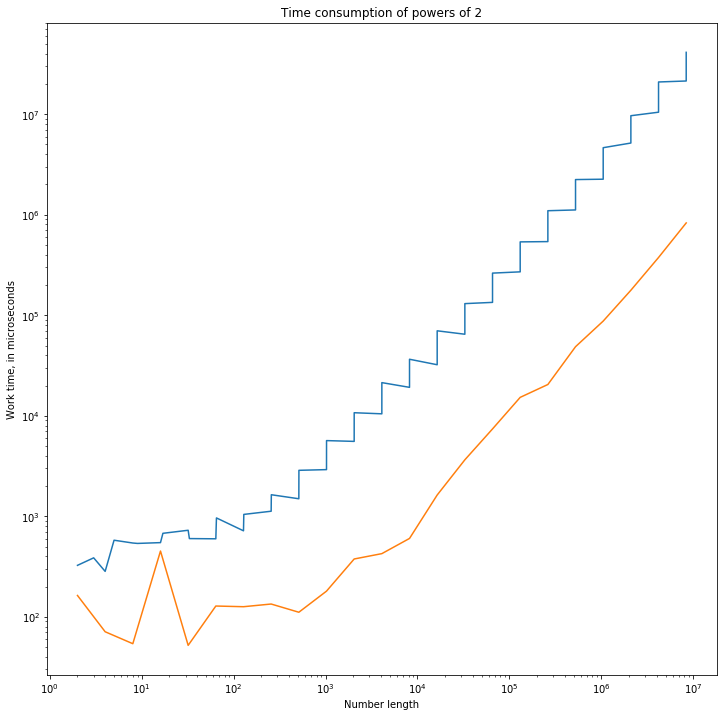

In [17]:
fig1 = plt.figure(1, (12, 12))
plt.yscale('log')
plt.xscale('log')
plt.title("Time consumption of powers of 2")
plt.xlabel('Number length')
plt.ylabel('Work time, in microseconds')
plt.plot(x_, y_, label="Heap" )
plt.plot(x_2, y_2_numpy, label = 'numpy.fft.fft')

# Check on prime numbers (worst case)

$$Time = O(N\cdot(p_1 + p_2 + ... + p_n) \approx O(N^2)$$

In [ ]:
primes = [int(item) for item in ("2      3      5      7     11     13     17     19     23     29 \
    31     37     41     43     47     53     59     61     67     71 \
     73     79     83     89     97    101    103    107    109    113 \
    127    131    137    139    149    151    157    163    167    173 \
    179    181    191    193    197    199    211    223    227    229 \
    233    239    241    251    257    263    269    271    277    281 \
    283    293    307    311    313    317    331    337    347    349 \
    353    359    367    373    379    383    389    397    401    409 \
    419    421    431    433    439    443    449    457    461    463 \
    467    479    487    491    499    503    509    521    523    541 \
    547    557    563    569    571    577    587    593    599    601 \
    607    613    617    619    631    641    643    647    653    659 \
    661    673    677    683    691    701    709    719    727    733 \
    739    743    751    757    761    769    773    787    797    809 \
    811    821    823    827    829    839    853    857    859    863 \
    877    881    883    887    907    911    919    929    937    941 \
    947    953    967    971    977    983    991    997   1009   1013 \
   1019   1021   1031   1033   1039   1049   1051   1061   1063   1069 \
   1087   1091   1093   1097   1103   1109   1117   1123   1129   1151 \
   1153   1163   1171   1181   1187   1193   1201   1213   1217   1223 \
   1229   1231   1237   1249   1259   1277   1279   1283   1289   1291 \
   1297   1301   1303   1307   1319   1321   1327   1361   1367   1373 \
   1381   1399   1409   1423   1427   1429   1433   1439   1447   1451 \
   1453   1459   1471   1481   1483   1487   1489   1493   1499   1511 \
   1523   1531   1543   1549   1553   1559   1567   1571   1579   1583 \
   1597   1601   1607   1609   1613   1619   1621   1627   1637   1657 \
   1663   1667   1669   1693   1697   1699   1709   1721   1723   1733 \
   1741   1747   1753   1759   1777   1783   1787   1789   1801   1811 \
   1823   1831   1847   1861   1867   1871   1873   1877   1879   1889 \
   1901   1907   1913   1931   1933   1949   1951   1973   1979   1987 \
   1993   1997   1999   2003   2011   2017   2027   2029   2039   2053 \
   2063   2069   2081   2083   2087   2089   2099   2111   2113   2129 \
   2131   2137   2141   2143   2153   2161   2179   2203   2207   2213 \
   2221   2237   2239   2243   2251   2267   2269   2273   2281   2287 \
   2293   2297   2309   2311   2333   2339   2341   2347   2351   2357 \
   2371   2377   2381   2383   2389   2393   2399   2411   2417   2423 \
   2437   2441   2447   2459   2467   2473   2477   2503   2521   2531 \
   2539   2543   2549   2551   2557   2579   2591   2593   2609   2617 \
   2621   2633   2647   2657   2659   2663   2671   2677   2683   2687 \
   2689   2693   2699   2707   2711   2713   2719   2729   2731   2741 \
   2749   2753   2767   2777   2789   2791   2797   2801   2803   2819 \
   2833   2837   2843   2851   2857   2861   2879   2887   2897   2903 \
   2909   2917   2927   2939   2953   2957   2963   2969   2971   2999 \
   3001   3011   3019   3023   3037   3041   3049   3061   3067   3079 \
   3083   3089   3109   3119   3121   3137   3163   3167   3169   3181 \
   3187   3191   3203   3209   3217   3221   3229   3251   3253   3257 \
   3259   3271   3299   3301   3307   3313   3319   3323   3329   3331 \
   3343   3347   3359   3361   3371   3373   3389   3391   3407   3413 \
   3433   3449   3457   3461   3463   3467   3469   3491   3499   3511 \
   3517   3527   3529   3533   3539   3541   3547   3557   3559   3571 \
   3581   3583   3593   3607   3613   3617   3623   3631   3637   3643 \
   3659   3671   3673   3677   3691   3697   3701   3709   3719   3727 \
   3733   3739   3761   3767   3769   3779   3793   3797   3803   3821 \
   3823   3833   3847   3851   3853   3863   3877   3881   3889   3907 \
   3911   3917   3919   3923   3929   3931   3943   3947   3967   3989 \
   4001   4003   4007   4013   4019   4021   4027   4049   4051   4057 \
   4073   4079   4091   4093   4099   4111   4127   4129   4133   4139 \
   4153   4157   4159   4177   4201   4211   4217   4219   4229   4231 \
   4241   4243   4253   4259   4261   4271   4273   4283   4289   4297 \
   4327   4337   4339   4349   4357   4363   4373   4391   4397   4409 \
   4421   4423   4441   4447   4451   4457   4463   4481   4483   4493 \
   4507   4513   4517   4519   4523   4547   4549   4561   4567   4583 \
   4591   4597   4603   4621   4637   4639   4643   4649   4651   4657 \
   4663   4673   4679   4691   4703   4721   4723   4729   4733   4751 \
   4759   4783   4787   4789   4793   4799   4801   4813   4817   4831 \
   4861   4871   4877   4889   4903   4909   4919   4931   4933   4937 \
   4943   4951   4957   4967   4969   4973   4987   4993   4999   5003 \
   5009   5011   5021   5023   5039   5051   5059   5077   5081   5087 \
   5099   5101   5107   5113   5119   5147   5153   5167   5171   5179 \
   5189   5197   5209   5227   5231   5233   5237   5261   5273   5279 \
   5281   5297   5303   5309   5323   5333   5347   5351   5381   5387 \
   5393   5399   5407   5413   5417   5419   5431   5437   5441   5443 \
   5449   5471   5477   5479   5483   5501   5503   5507   5519   5521 \
   5527   5531   5557   5563   5569   5573   5581   5591   5623   5639 \
   5641   5647   5651   5653   5657   5659   5669   5683   5689   5693 \
   5701   5711   5717   5737   5741   5743   5749   5779   5783   5791 \
   5801   5807   5813   5821   5827   5839   5843   5849   5851   5857 \
   5861   5867   5869   5879   5881   5897   5903   5923   5927   5939 \
   5953   5981   5987   6007   6011   6029   6037   6043   6047   6053 \
   6067   6073   6079   6089   6091   6101   6113   6121   6131   6133 \
   6143   6151   6163   6173   6197   6199   6203   6211   6217   6221 \
   6229   6247   6257   6263   6269   6271   6277   6287   6299   6301 \
   6311   6317   6323   6329   6337   6343   6353   6359   6361   6367 \
   6373   6379   6389   6397   6421   6427   6449   6451   6469   6473 \
   6481   6491   6521   6529   6547   6551   6553   6563   6569   6571 \
   6577   6581   6599   6607   6619   6637   6653   6659   6661   6673 \
   6679   6689   6691   6701   6703   6709   6719   6733   6737   6761 \
   6763   6779   6781   6791   6793   6803   6823   6827   6829   6833 \
   6841   6857   6863   6869   6871   6883   6899   6907   6911   6917 \
   6947   6949   6959   6961   6967   6971   6977   6983   6991   6997 \
   7001   7013   7019   7027   7039   7043   7057   7069   7079   7103 \
   7109   7121   7127   7129   7151   7159   7177   7187   7193   7207\
   7211   7213   7219   7229   7237   7243   7247   7253   7283   7297 \
   7307   7309   7321   7331   7333   7349   7351   7369   7393   7411 \
   7417   7433   7451   7457   7459   7477   7481   7487   7489   7499 \
   7507   7517   7523   7529   7537   7541   7547   7549   7559   7561 \
   7573   7577   7583   7589   7591   7603   7607   7621   7639   7643 \
   7649   7669   7673   7681   7687   7691   7699   7703   7717   7723 \
   7727   7741   7753   7757   7759   7789   7793   7817   7823   7829 \
   7841   7853   7867   7873   7877   7879   7883   7901   7907   7919".split())]

In [11]:
y_primes_numpy = []
for N in primes:
    A = np.random.randint(10, size=N)
    t0 = time.time()
    np.fft.fft(A)
    t1 = time.time()
#     print(int(1000000*(t1 - t0)))
    y_primes_numpy.append(int(1000000*(t1 - t0)))

In [13]:
y_primes_my = []
for N in primes:
    out = os.popen("./a.out " + str(N)).read()
    y_primes_my.append(int(out[10:-3]))
#     print(y_primes_my[-1])

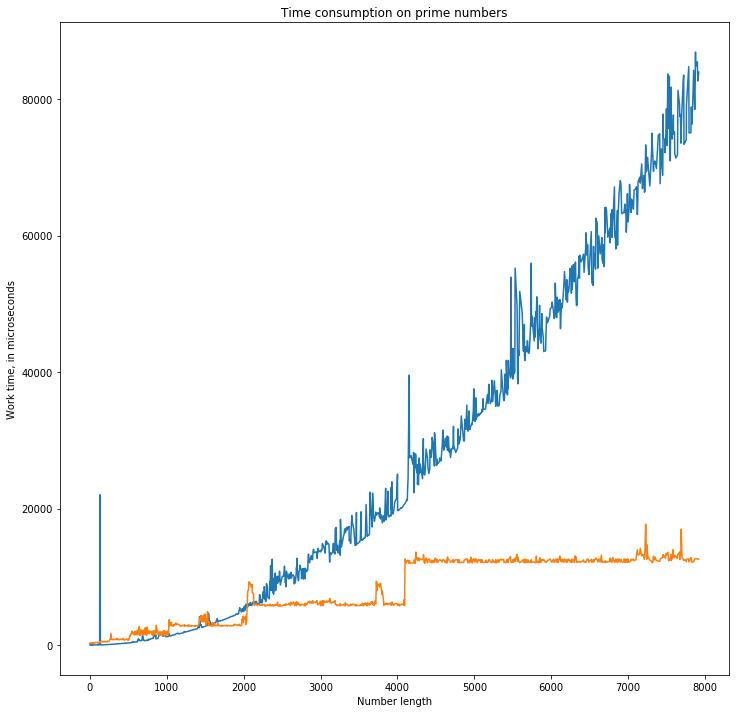

In [16]:
fig1 = plt.figure(1, (12, 12))
# plt.yscale('log')
# plt.xscale('log')
plt.title("Time consumption on prime numbers")
plt.xlabel('Number length')
plt.ylabel('Work time, in microseconds')
plt.plot(primes, y_primes_numpy)
plt.plot(primes, y_primes_my)